# Coverage of Pneumococcal, Shingles, and Tetanus Vaccines

### Given the increasing levels of skepticism around vaccines following the COVID-19 pandemic and the associated vaccine mandate, I wanted to take a quick look at vaccination rates against unrelated diseases.

This data set was sourced from U.S. Department of Health & Human Services via data.gov and covers 2008 to 2023. Here, I look at each vaccine's estimated coverage by year and age group.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
data_file = pd.read_csv('https://github.com/akozikow/Vaccination-Coverage/raw/refs/heads/main/Vaccination_Coverage_among_Adults__18__Years_.csv')

In [3]:
data_file.head(5)

,Vaccine,Dose,Geography Type,Geography,FIPS,Survey Year,Dimension Type,Dimension,Estimate (%),95% CI (%),Sample Size
0,Tetanus,Tdap,States/Local Areas,Maryland,24,2019,>=18 Years,Overall,44.5,42.9 to 46.1,8824.0
1,Zoster (Shingles),NaN,States/Local Areas,Maryland,24,2017,>=60 Years,Overall,43.3,41.5 to 45.0,6232.0
2,Tetanus,Tdap,States/Local Areas,Maryland,24,2011,18-64 Years,Overall,14.6,11.9 to 17.2,1795.0
3,Tetanus,Tdap,States/Local Areas,Maryland,24,2010,18-64 Years,Overall,9.8,8.0 to 11.6,2130.0
4,Tetanus,Td or Tdap,States/Local Areas,Maryland,24,2013,>=18 Years,"Black, Non-Hispanic",57.8,54.6 to 60.9,2144.0


In [4]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66360 entries, 0 to 66359
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Vaccine         66360 non-null  object 
 1   Dose            17990 non-null  object 
 2   Geography Type  66360 non-null  object 
 3   Geography       66360 non-null  object 
 4   FIPS            66360 non-null  int64  
 5   Survey Year     66360 non-null  int64  
 6   Dimension Type  66360 non-null  object 
 7   Dimension       66360 non-null  object 
 8   Estimate (%)    66360 non-null  object 
 9   95% CI (%)      63763 non-null  object 
 10  Sample Size     19461 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 5.6+ MB


In [5]:
data_file['Vaccine'].unique()

array(['Tetanus', 'Zoster (Shingles)', 'Pneumococcal'], dtype=object)

In [6]:
sorted(data_file['Survey Year'].unique())

[np.int64(2008),
 np.int64(2009),
 np.int64(2010),
 np.int64(2011),
 np.int64(2012),
 np.int64(2013),
 np.int64(2014),
 np.int64(2015),
 np.int64(2016),
 np.int64(2017),
 np.int64(2018),
 np.int64(2019),
 np.int64(2020),
 np.int64(2021),
 np.int64(2022),
 np.int64(2023)]

In [7]:
data_file['Dimension Type'].unique()

array(['>=18 Years', '>=60 Years', '18-64 Years', '>=65 Years',
       '60-64 Years', '18-64 Years at Increased Risk', '18-49 Years',
       '50-64 Years'], dtype=object)

In [8]:
#would like to group by the following:
    #vaccine
    #year
    #dimension type (age group)
    #estimate

In [9]:
data_file['Estimate (%)'] = pd.to_numeric(data_file['Estimate (%)'], errors='coerce')
data_file['Estimate (%)'].isnull().value_counts()

Estimate (%)
False    63763
True      2597
Name: count, dtype: int64

In [10]:
data_file.dropna(subset = ['Estimate (%)'], inplace = True)
data_file['Estimate (%)'].isnull().value_counts()

Estimate (%)
False    63763
Name: count, dtype: int64

In [11]:
data_file['Dimension Type'].isnull().value_counts()

Dimension Type
False    63763
Name: count, dtype: int64

In [12]:
data_file['Survey Year'].isnull().value_counts()

Survey Year
False    63763
Name: count, dtype: int64

In [13]:
data_file['Vaccine'].isnull().value_counts()

Vaccine
False    63763
Name: count, dtype: int64

In [61]:
grouped_data = pd.DataFrame(data_file.groupby(['Vaccine', 'Survey Year', 'Dimension Type'])['Estimate (%)'].mean())
grouped_data = grouped_data.reset_index()
grouped_data

,Vaccine,Survey Year,Dimension Type,Estimate (%)
0,Pneumococcal,2008,18-64 Years at Increased Risk,23.947518
1,Pneumococcal,2008,>=65 Years,61.843729
2,Pneumococcal,2009,18-64 Years at Increased Risk,25.111439
3,Pneumococcal,2009,>=65 Years,63.168852
4,Pneumococcal,2010,18-64 Years at Increased Risk,28.426644
...,...,...,...,...
144,Zoster (Shingles),2022,>=60 Years,44.803448
145,Zoster (Shingles),2022,>=65 Years,53.083333
146,Zoster (Shingles),2023,60-64 Years,41.143548
147,Zoster (Shingles),2023,>=60 Years,49.118571


In [40]:
pneumo = grouped_data[grouped_data['Vaccine'] == 'Pneumococcal']
shingles = grouped_data[grouped_data['Vaccine'] == 'Zoster (Shingles)']
tetanus	 = grouped_data[grouped_data['Vaccine'] == 'Tetanus']

In [50]:
pneumo['Dimension Type'].unique()

array(['18-64 Years at Increased Risk', '>=65 Years'], dtype=object)

Text(0.5, 1.0, 'Pneumococcal Vaccine Coverage:>=65 Years')

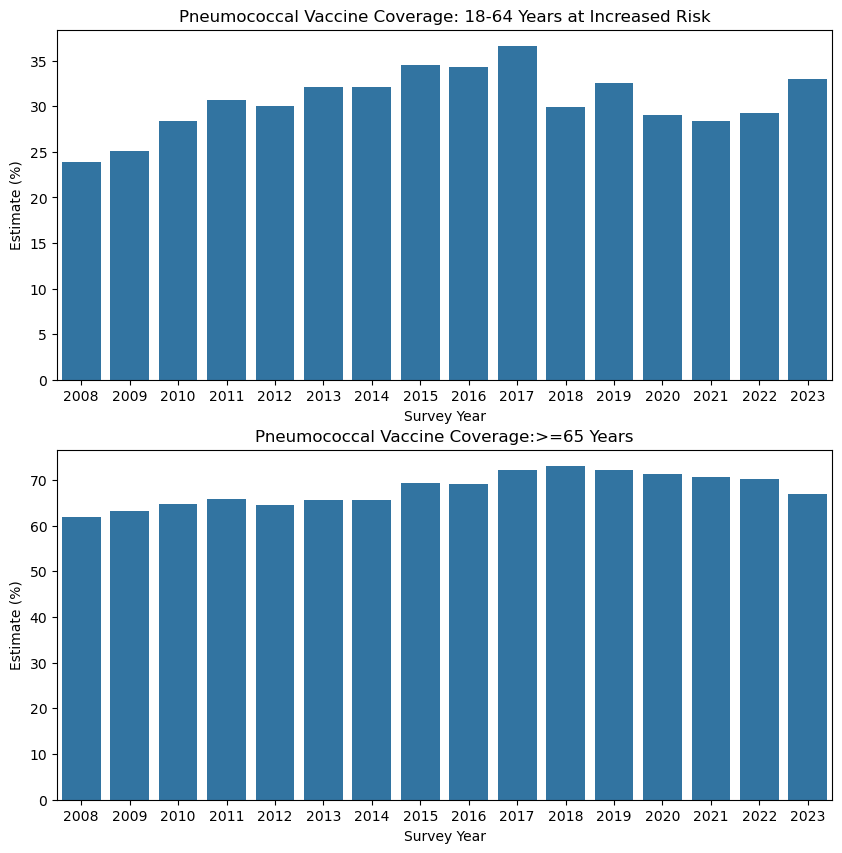

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 10))
plt.subplot(2, 1, 1)
sns.barplot(data = pneumo[pneumo['Dimension Type'] == '18-64 Years at Increased Risk'], x = 'Survey Year', y = 'Estimate (%)')
plt.title('Pneumococcal Vaccine Coverage: 18-64 Years at Increased Risk')
plt.subplot(2, 1, 2)
sns.barplot(data = pneumo[pneumo['Dimension Type'] == '>=65 Years'], x = 'Survey Year', y = 'Estimate (%)')
plt.title('Pneumococcal Vaccine Coverage:>=65 Years')

In [81]:
shingles['Dimension Type'].unique()

array(['60-64 Years', '>=60 Years', '>=65 Years'], dtype=object)

Text(0.5, 1.0, 'Shinges Vaccine Coverage: >=65 Years')

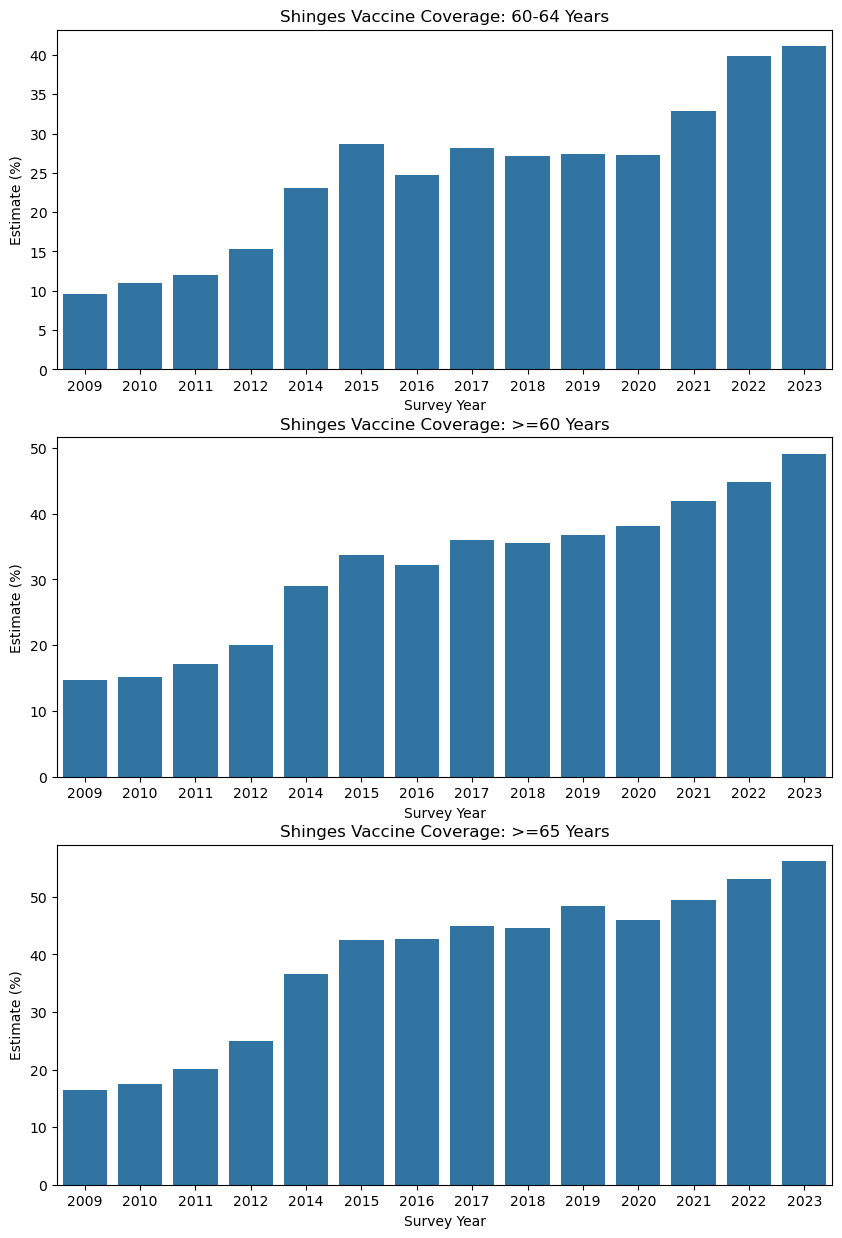

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 15))
plt.subplot(3, 1, 1)
sns.barplot(data = shingles[shingles['Dimension Type'] == '60-64 Years'], x = 'Survey Year', y = 'Estimate (%)')
plt.title('Shinges Vaccine Coverage: 60-64 Years')
plt.subplot(3, 1, 2)
sns.barplot(data = shingles[shingles['Dimension Type'] == '>=60 Years'], x = 'Survey Year', y = 'Estimate (%)')
plt.title('Shinges Vaccine Coverage: >=60 Years')
plt.subplot(3, 1, 3)
sns.barplot(data = shingles[shingles['Dimension Type'] == '>=65 Years'], x = 'Survey Year', y = 'Estimate (%)')
plt.title('Shinges Vaccine Coverage: >=65 Years')

In [86]:
tetanus['Dimension Type'].unique()

array(['18-49 Years', '18-64 Years', '50-64 Years', '>=18 Years',
       '>=65 Years'], dtype=object)

Text(0.5, 1.0, 'Tetanus Vaccine Coverage: >=65 Years')

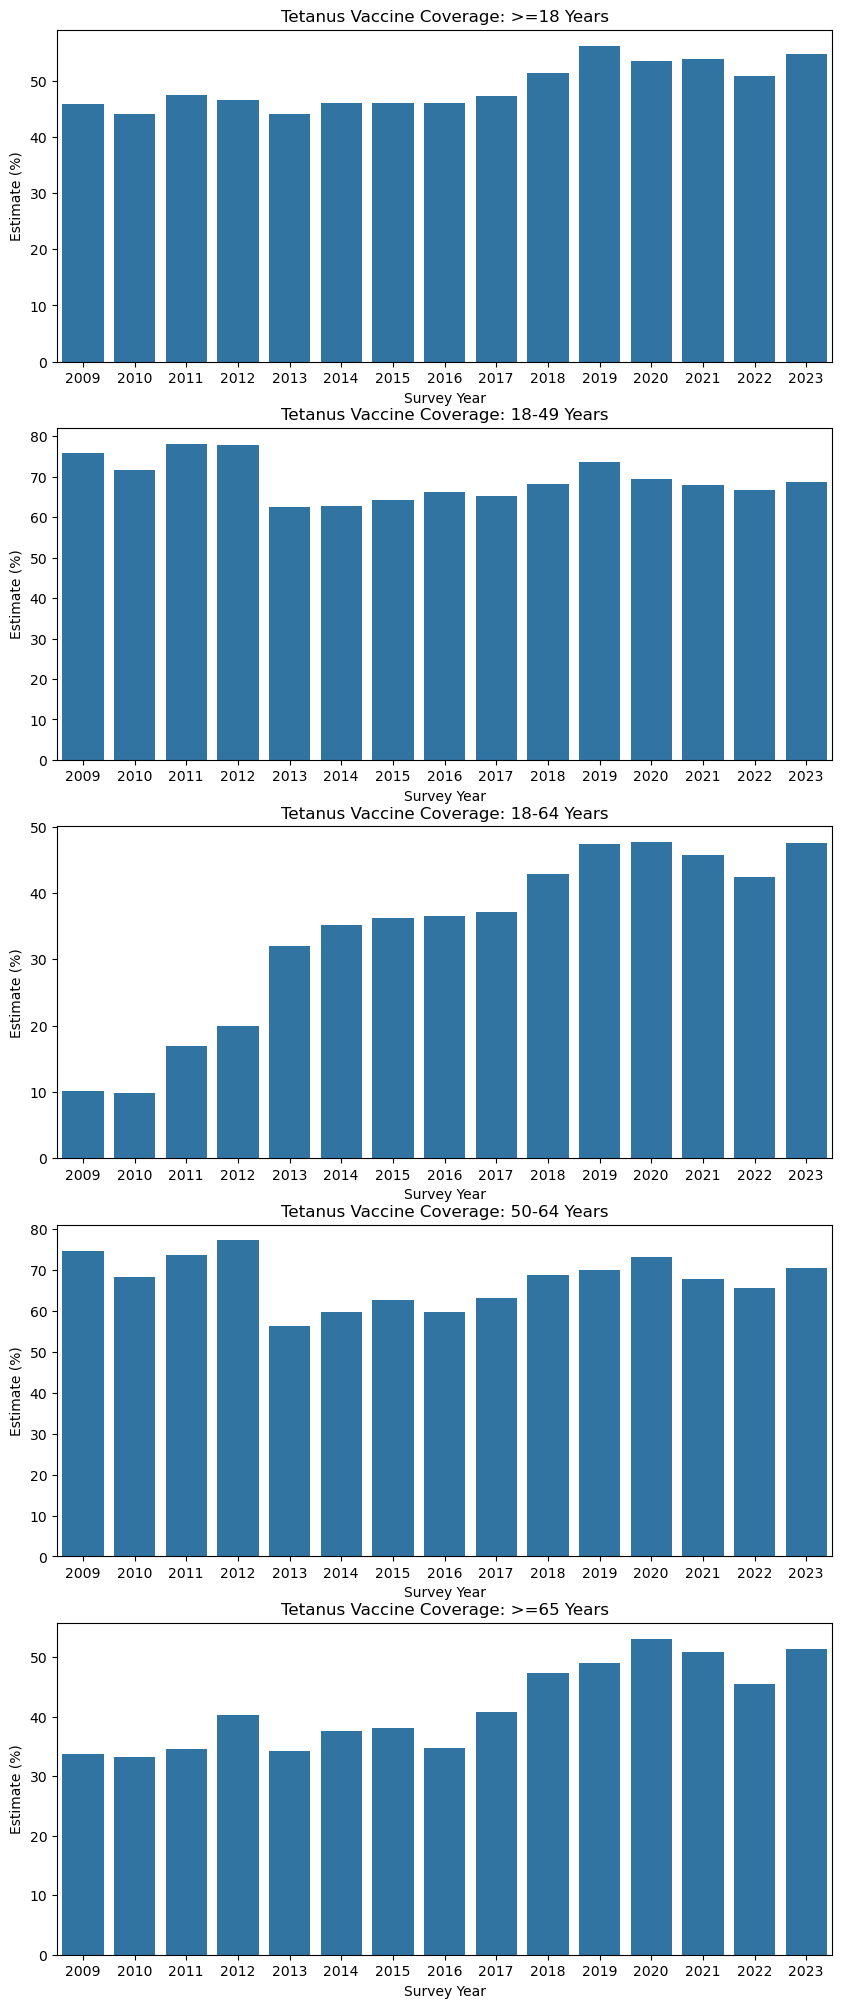

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 25))
plt.subplot(5, 1, 1)
sns.barplot(data = tetanus[tetanus['Dimension Type'] == '>=18 Years'], x = 'Survey Year', y = 'Estimate (%)')
plt.title('Tetanus Vaccine Coverage: >=18 Years')
plt.subplot(5, 1, 2)
sns.barplot(data = tetanus[tetanus['Dimension Type'] == '18-49 Years'], x = 'Survey Year', y = 'Estimate (%)')
plt.title('Tetanus Vaccine Coverage: 18-49 Years')
plt.subplot(5, 1, 3)
sns.barplot(data = tetanus[tetanus['Dimension Type'] == '18-64 Years'], x = 'Survey Year', y = 'Estimate (%)')
plt.title('Tetanus Vaccine Coverage: 18-64 Years')
plt.subplot(5, 1, 4)
sns.barplot(data = tetanus[tetanus['Dimension Type'] == '50-64 Years'], x = 'Survey Year', y = 'Estimate (%)')
plt.title('Tetanus Vaccine Coverage: 50-64 Years')
plt.subplot(5, 1, 5)
sns.barplot(data = tetanus[tetanus['Dimension Type'] == '>=65 Years'], x = 'Survey Year', y = 'Estimate (%)')
plt.title('Tetanus Vaccine Coverage: >=65 Years')

# Vaccination Rates do not seem to be declining from 2020 onwards

In this very simple evaluation, any vaccine hesitancy that has an impact on the vaccination rates against other diseases is not captured in this data. In fact, Shingles vaccination rate seeemed to have incrases, where the other two remained steady.

There are a few areas where this analysis could be improved:
1) Changing from a simple average 'Estimate (%)' to a weighted average based on sample size.
2) Focusing on specific geographic areas instead of aggregating the whole country together. This removes the possibility that different years have different geographical locations, and therefore different popuations, contributing to them.
3) Different geographical locations have overlapping Age groups (e.g., >=18 years includes 18-49 years by nature). Focusing on single geographic locations should remove this confoudning factor as well.